# Covariance and Correlation

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

A covariância mede como duas variáveis ​​variam em conjunto em relação às suas médias.

Por exemplo, digamos que trabalhamos para uma empresa de comércio eletrônico e eles estão interessados ​​em encontrar uma correlação entre a velocidade da página (quão rápido cada página da web é renderizada para um cliente) e quanto um cliente gasta.

numpy oferece métodos de covariância, mas faremos isso da "maneira mais difícil" para mostrar o que acontece nos bastidores. Basicamente tratamos cada variável como um vetor de desvios da média e calculamos o “produto escalar” de ambos os vetores. Geometricamente, isso pode ser pensado como o ângulo entre os dois vetores em um espaço de alta dimensão, mas você pode pensar nisso apenas como uma medida de similaridade entre as duas variáveis.

Primeiro, vamos tornar a velocidade da página e o valor da compra totalmente aleatórios e independentes um do outro; resultará uma covariância muito pequena, pois não há correlação real:

np.float64(-0.10042470614987019)

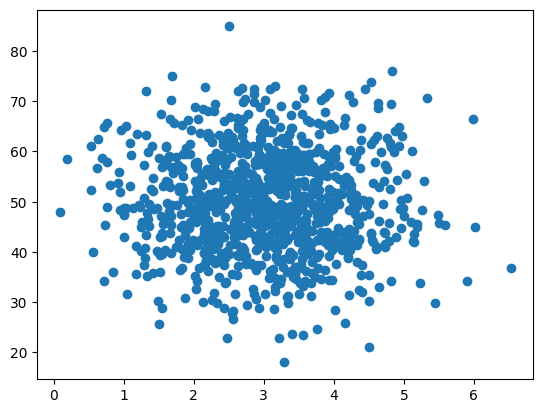

In [1]:
%matplotlib inline

import numpy as np
from pylab import *

def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)


Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

Agora faremos com que nossos valores de compra fabricados sejam uma função real da velocidade da página, fazendo uma correlação muito real. O valor negativo indica uma relação inversa; páginas que são renderizadas em menos tempo resultam em mais dinheiro gasto:

np.float64(-10.354327941098882)

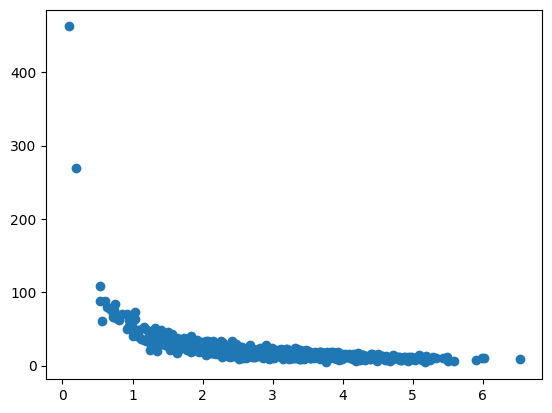

In [2]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):


Mas, o que significa esse valor? A covariância é sensível às unidades utilizadas nas variáveis, o que dificulta sua interpretação. A correlação normaliza tudo por seus desvios padrão, proporcionando um valor mais fácil de entender que varia de -1 (para uma correlação inversa perfeita) a 1 (para uma correlação positiva perfeita):

In [3]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

correlation(pageSpeeds, purchaseAmount)

np.float64(-0.5328941298622702)

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:


numpy pode fazer tudo isso para você com numpy.corrcoef. Ele retorna uma matriz dos coeficientes de correlação entre cada combinação das matrizes passadas:

In [4]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.53236124],
       [-0.53236124,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):


(Não corresponde exatamente devido à precisão matemática disponível em um computador.)

Podemos forçar uma correlação perfeita fabricando uma relação totalmente linear (novamente, não é exatamente -1 apenas devido a erros de precisão, mas é próxima o suficiente para nos dizer que há uma correlação realmente boa aqui):

np.float64(-1.001001001001001)

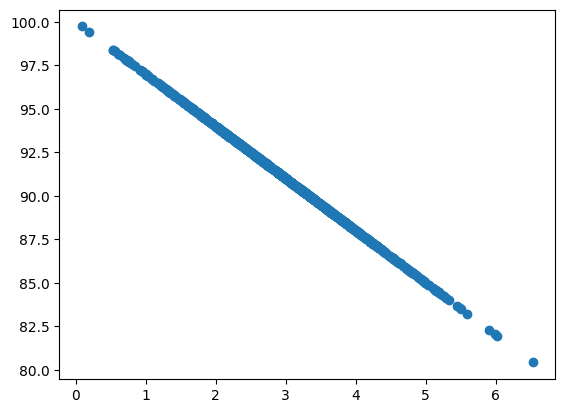

In [5]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)

Remember, correlation does not imply causality!


Lembre-se, correlação não implica causalidade!

## Activity

numpy also has a numpy.cov function that can compute Covariance for you. Try using it for the pageSpeeds and purchaseAmounts data above. Interpret its results, and compare it to the results from our own covariance function above.

numpy também possui uma função numpy.cov que pode calcular Covariância para você. Tente usá-lo para os dados pageSpeeds e PurchaseAmounts acima. Interprete seus resultados e compare-os com os resultados de nossa própria função de covariância acima.

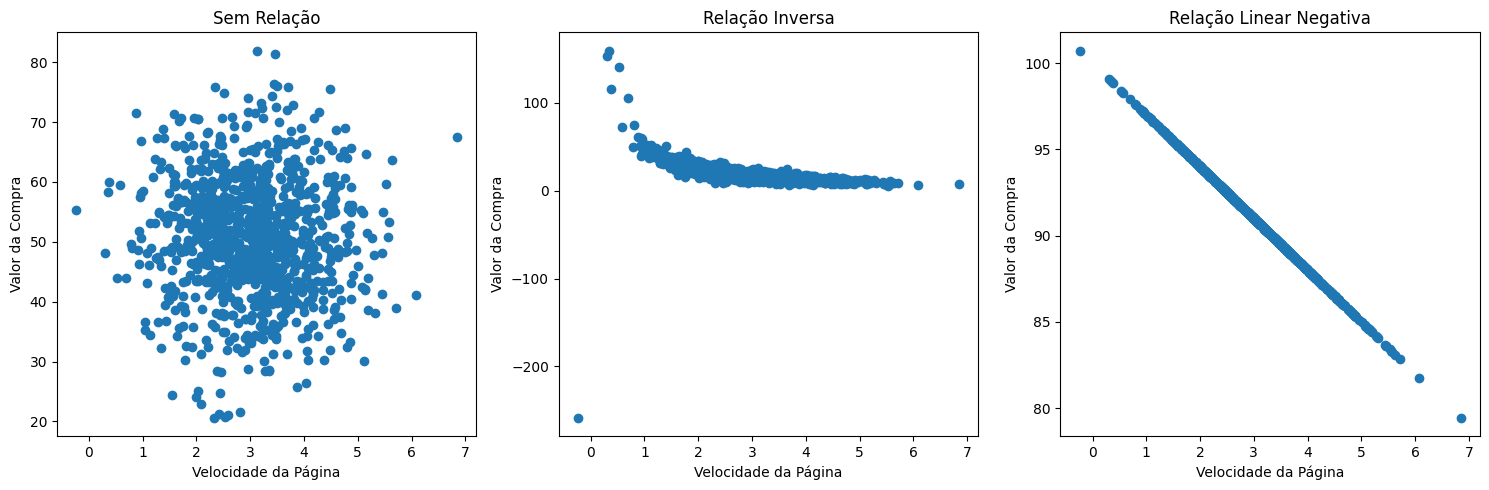

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de covariância e correlação
def de_mean(x):
    return x - np.mean(x)

def covariance(x, y):
    return np.dot(de_mean(x), de_mean(y)) / (len(x) - 1)

def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    
    if stddevx == 0 or stddevy == 0:
        return 0  

    return covariance(x, y) / (stddevx * stddevy)

# Gerando três conjuntos de dados
np.random.seed(42)  # Para reprodutibilidade

pageSpeeds = np.random.normal(3.0, 1.0, 1000)

# 1. Dados aleatórios sem relação
purchaseAmount1 = np.random.normal(50.0, 10.0, 1000)

# 2. Relação inversa
purchaseAmount2 = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

# 3. Relação linear negativa
purchaseAmount3 = 100 - pageSpeeds * 3

# Criando subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Dispersão sem relação
axs[0].scatter(pageSpeeds, purchaseAmount1)
axs[0].set_title("Sem Relação")
axs[0].set_xlabel("Velocidade da Página")
axs[0].set_ylabel("Valor da Compra")

# Gráfico 2: Relação Inversa
axs[1].scatter(pageSpeeds, purchaseAmount2)
axs[1].set_title("Relação Inversa")
axs[1].set_xlabel("Velocidade da Página")
axs[1].set_ylabel("Valor da Compra")

# Gráfico 3: Relação Linear Negativa
axs[2].scatter(pageSpeeds, purchaseAmount3)
axs[2].set_title("Relação Linear Negativa")
axs[2].set_xlabel("Velocidade da Página")
axs[2].set_ylabel("Valor da Compra")

# Ajustando layout
plt.tight_layout()
plt.show()